<h1 align="center"> Statistics and Financial Data Analysis </h1>



In [1]:
import pandas_datareader as pd_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import math as m
import scipy as sp
import datetime

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor, BaggingRegressor, BaggingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Hitters.csv')
df = df.dropna()
df['logSalary'] = np.log(df['Salary'])

In [3]:
df.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,logSalary
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,N,W,632,43,10,475.000,N,6.163315
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,A,W,880,82,14,480.000,A,6.173786
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,N,E,200,11,3,500.000,N,6.214608
4,321,87,10,39,42,30,2,396,101,12,...,46,33,N,E,805,40,4,91.500,N,4.516339
5,594,169,4,74,51,35,11,4408,1133,19,...,336,194,A,W,282,421,25,750.000,A,6.620073
6,185,37,1,23,8,21,2,214,42,1,...,9,24,N,E,76,127,7,70.000,A,4.248495
7,298,73,0,24,24,7,3,509,108,0,...,37,12,A,W,121,283,9,100.000,A,4.605170
8,323,81,6,26,32,8,2,341,86,6,...,34,8,N,W,143,290,19,75.000,N,4.317488
9,401,92,17,49,66,65,13,5206,1332,253,...,890,866,A,E,0,0,0,1100.000,A,7.003065
10,574,159,21,107,75,59,10,4631,1300,90,...,504,488,A,E,238,445,22,517.143,A,6.248319


In [4]:
R1 = df[df['Years']>4.5]
R1['logSalary'].mean()

6.3540358427830235

In [5]:
R2 = df[df['Years']<=4.5]
R2['logSalary'].mean()

5.1067896059973705

In [6]:
R3 = df[(df['Years']>4.5)&(df['Hits']>=117.5)]
R3['logSalary'].mean()

6.739686922104511

In [7]:
R4 = df[(df['Years']>4.5)&(df['Hits']<117.5)]
R4['logSalary'].mean()

5.9983798474087635

In [8]:
df.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague', 'logSalary'],
      dtype='object')

In [9]:
X = df[['Years','Hits']].values
y = df['logSalary'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = DecisionTreeRegressor(max_depth=2)
model = model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test, y_pred))

0.5741315737021508
0.3611815340241412


In [11]:
df.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague', 'logSalary'],
      dtype='object')

In [12]:
newdf = df[['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks',
       'PutOuts', 'Assists', 'Errors']]

X = df[['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks',
       'PutOuts', 'Assists', 'Errors']].values
y = df['logSalary'].values

In [13]:
X.shape

(263, 16)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = DecisionTreeRegressor(max_depth=4)
model = model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test, y_pred))

0.8124494775375759
0.1590627086372231


[Text(0.48, 0.9, 'x[7] <= 1407.5\nsquared_error = 0.761\nsamples = 184\nvalue = 5.912'),
 Text(0.22, 0.7, 'x[8] <= 182.5\nsquared_error = 0.334\nsamples = 71\nvalue = 5.092'),
 Text(0.08, 0.5, 'x[1] <= 14.0\nsquared_error = 0.326\nsamples = 37\nvalue = 4.766'),
 Text(0.04, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 7.663'),
 Text(0.12, 0.3, 'x[11] <= 51.0\nsquared_error = 0.096\nsamples = 36\nvalue = 4.685'),
 Text(0.08, 0.1, 'squared_error = 0.068\nsamples = 25\nvalue = 4.551'),
 Text(0.16, 0.1, 'squared_error = 0.023\nsamples = 11\nvalue = 4.991'),
 Text(0.36, 0.5, 'x[0] <= 465.0\nsquared_error = 0.101\nsamples = 34\nvalue = 5.447'),
 Text(0.28, 0.3, 'x[11] <= 121.5\nsquared_error = 0.07\nsamples = 24\nvalue = 5.576'),
 Text(0.24, 0.1, 'squared_error = 0.027\nsamples = 12\nvalue = 5.403'),
 Text(0.32, 0.1, 'squared_error = 0.053\nsamples = 12\nvalue = 5.749'),
 Text(0.44, 0.3, 'x[13] <= 322.5\nsquared_error = 0.041\nsamples = 10\nvalue = 5.137'),
 Text(0.4, 0.1, 'squared_error =

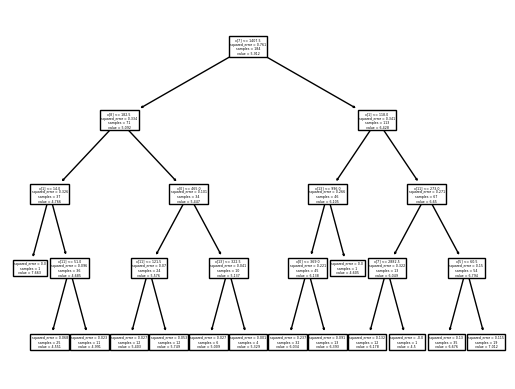

In [15]:
 tree.plot_tree(model)

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

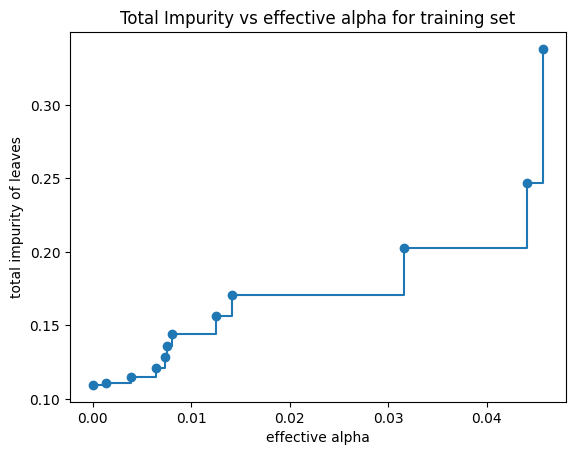

In [16]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = BaggingRegressor()
model = model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test, y_pred))

0.8290783969669686
0.14495962360487247


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = RandomForestRegressor()
model = model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test, y_pred))

0.8442097478089949
0.13212663535897176


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = GradientBoostingRegressor()
model = model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test, y_pred))

0.833907050661409
0.14086441381486658


In [21]:
df = pd.read_csv('CreditCardData.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43681 entries, 0 to 43680
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43681 non-null  int64  
 1   V1          43681 non-null  float64
 2   V2          43681 non-null  float64
 3   V3          43681 non-null  float64
 4   V4          43681 non-null  float64
 5   V5          43681 non-null  float64
 6   V6          43681 non-null  float64
 7   V7          43681 non-null  float64
 8   V8          43681 non-null  float64
 9   V9          43681 non-null  float64
 10  V10         43681 non-null  float64
 11  V11         43681 non-null  float64
 12  V12         43681 non-null  float64
 13  V13         43681 non-null  float64
 14  V14         43681 non-null  float64
 15  V15         43681 non-null  float64
 16  V16         43681 non-null  float64
 17  V17         43681 non-null  float64
 18  V18         43680 non-null  float64
 19  V19         43680 non-nul

In [23]:
df.tail()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43676,41605,-2.124575,0.062763,1.241179,0.314861,-1.429539,-0.257928,-0.601996,0.986393,-0.087686,...,0.347357,0.730357,-0.070482,0.600373,-0.48178,0.470592,-0.275938,-0.166828,88.00,0.0
43677,41605,1.128492,0.154872,0.425385,1.275186,-0.100392,0.140953,-0.051615,0.143311,0.059101,...,-0.054433,0.042567,-0.069599,0.033582,0.62864,-0.329126,0.035518,0.004856,5.00,0.0
43678,41605,-3.062677,3.098384,-4.751905,1.726366,-0.848178,-1.629881,-1.464473,2.601511,-0.579248,...,0.020136,-0.245436,0.081065,-0.323977,-0.26353,-0.371010,0.089257,-0.191195,1.00,0.0
43679,41606,-1.200424,-0.050464,2.319384,0.062695,-0.794518,0.764863,-0.041060,0.418438,0.345849,...,-0.126852,-0.103167,0.003841,0.087676,-0.10108,1.145146,0.163202,0.166503,120.34,0.0
43680,41607,-0.628151,1.125963,1.735514,-0.093631,0.116582,-0.579938,0.887681,-0.204629,-0.198075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.tail()
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df = df.dropna()

In [25]:
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [26]:
# The column "Class" represens the occurences of fraud or not
# As can be seen, there are a small number of occurrances

cred_card = df['Class'].value_counts()
cred_card

0.0    43546
1.0      134
Name: Class, dtype: int64

In [27]:
percent_fraud = cred_card/len(df.index)
print(percent_fraud)


0.0    0.996932
1.0    0.003068
Name: Class, dtype: float64


In [28]:
X = df.iloc[:,:29].values
y = df['Class'].values

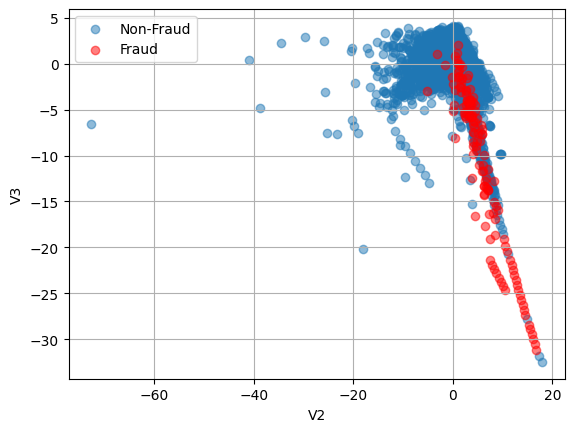

In [29]:
plt.scatter(df.V2[df.Class == 0], df.V3[df.Class == 0], label="Non-Fraud", alpha=0.5)
plt.scatter(df.V2[df.Class == 1], df.V3[df.Class == 1], label="Fraud", alpha=0.5, c='r')
plt.legend()
plt.xlabel('V2')
plt.ylabel('V3')
plt.grid()
#plt.show()
#plt.savefig('V2V3')

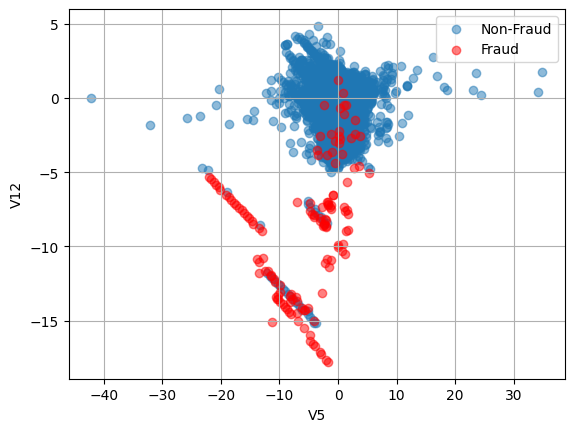

In [30]:
plt.scatter(df.V5[df.Class == 0], df.V12[df.Class == 0], label="Non-Fraud", alpha=0.5)
plt.scatter(df.V5[df.Class == 1], df.V12[df.Class == 1], label="Fraud", alpha=0.5, c='r')
plt.legend()
plt.xlabel('V5')
plt.ylabel('V12')
plt.grid()
#plt.show()
#plt.savefig('V5V12')

In [31]:
df = df.dropna()
X = df.iloc[:,:29].values
y = df['Class'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# R^2 metric
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test, y_pred))

0.5045554361310791
0.0014137669970612614


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1
                                                   )
model = DecisionTreeClassifier()#criterion = 'entropy', max_depth = 3)
model = model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9989316239316239


In [33]:
cross_val_score(model, X, y, cv=10)

array([0.99908425, 0.99931319, 0.99496337, 0.99771062, 0.9981685 ,
       0.99931319, 0.9981685 , 0.99931319, 0.99862637, 0.99839744])

[Text(0.24601910828025478, 0.9583333333333334, 'x[11] <= -5.005\ngini = 0.006\nsamples = 30576\nvalue = [30481, 95]'),
 Text(0.12738853503184713, 0.875, 'x[25] <= -0.236\ngini = 0.372\nsamples = 97\nvalue = [24, 73]'),
 Text(0.050955414012738856, 0.7916666666666666, 'x[19] <= 0.538\ngini = 0.391\nsamples = 30\nvalue = [22, 8]'),
 Text(0.025477707006369428, 0.7083333333333334, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.07643312101910828, 0.7083333333333334, 'x[16] <= -19.25\ngini = 0.083\nsamples = 23\nvalue = [22, 1]'),
 Text(0.050955414012738856, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.10191082802547771, 0.625, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.20382165605095542, 0.7916666666666666, 'x[19] <= 1.787\ngini = 0.058\nsamples = 67\nvalue = [2, 65]'),
 Text(0.17834394904458598, 0.7083333333333334, 'x[12] <= -1.422\ngini = 0.03\nsamples = 66\nvalue = [1, 65]'),
 Text(0.15286624203821655, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(

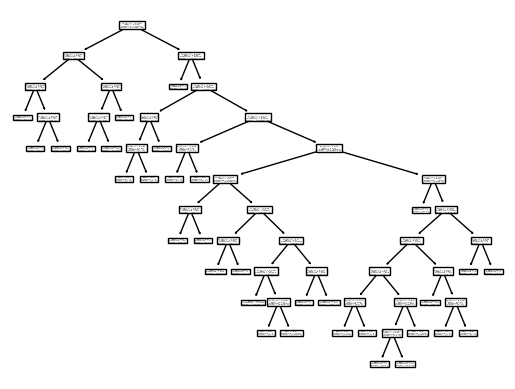

In [34]:
 tree.plot_tree(model)

In [35]:
# Define the model as the random forest
model = RandomForestClassifier(random_state=3, n_estimators=28)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9989316239316239


In [36]:
cross_val_score(model, X, y, cv=10)

array([0.99885531, 0.99954212, 0.99862637, 0.99748168, 0.99885531,
       0.99954212, 0.99885531, 0.99931319, 1.        , 0.99954212])